In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier


['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'Crm Cd 1']
67385


/var/folders/sv/3h00w8hd0kj7ncygzkyfbr580000gn/T/ipykernel_33374/2415168105.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Street Location'] = new_df['LOCATION'] + new_df['Cross Street']


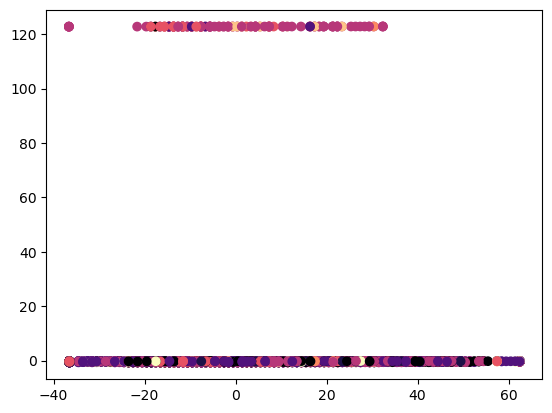

In [50]:
#DATA CLEANING CELL
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# print(len(my_data.columns))
crime_data = crime_data.drop(columns=['Vict Descent','Status','Status Desc'])
# print(len(my_data.columns))
all_c = list(crime_data.columns)
final = []
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
print(final)
crime_data.dropna(inplace=True,subset=final)
# my_data = my_data[my_data['LON'] != 0]
# my_data = my_data[my_data['LAT'] != 0]

print(len(crime_data))
# CODE TO DROP CRIMES WITH ONLY A FEW INCIDENTS
X = crime_data.drop(columns=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Crm Cd'])
y = crime_data['Crm Cd']
# allowed number of crime incidents to keep in data
num_incidents = 1000
crimes = []
for i in set(y):
    if len(crime_data[crime_data['Crm Cd']==i])>num_incidents:
        crimes.append(i)

new_df = crime_data[crime_data['Crm Cd'].isin(crimes)]
new_df['Street Location'] = new_df['LOCATION'] + new_df['Cross Street']
df = pd.get_dummies(new_df, columns = ['Street Location','Vict Sex', 'Premis Cd', 'Weapon Used Cd'], drop_first=True)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
# df['year'] = df['DATE OCC'].dt.year
# df['month'] = df['DATE OCC'].dt.month
# df['day'] = df['DATE OCC'].dt.day
# df['hour'] = df['DATE OCC'].dt.hour
# df['day_of_week'] = df['DATE OCC'].dt.dayofweek
columns_to_drop = []

for i in df.columns:
    if df[i].dtype!='float64' and df[i].dtype!= 'uint8' and df[i].dtype != 'int64':
        columns_to_drop.append(i)
    if re.search('Crm Cd*', i):
        columns_to_drop.append(i)
# columns_to_drop.append('Crm Cd 1')
# columns_to_drop.append('Crm Cd 2')
# columns_to_drop.append('Crm Cd 3')
# columns_to_drop.append('Crm Cd 4')
columns_to_drop.append('DR_NO')
columns_to_drop.append('Part 1-2')
columns_to_drop.append('TIME OCC')
columns_to_drop.append('AREA')
columns_to_drop.append('Rpt Dist No')

#print(df['LAT'].dtype)
#print(df['TIME OCC_5'].dtype)

new_df = df.drop(columns = columns_to_drop)
new_df


le = LabelEncoder()
y = le.fit_transform(df['Crm Cd'])
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap = 'magma')
vals = [X_pca[:,i] for i in range(len(X_pca.T))]
le = LabelEncoder()
y = le.fit_transform(df['Crm Cd'])

# plt.bar(range(1,51), pca.explained_variance_ratio_[:50])
# plt.title('Variance Ratio of first 50 Principal Components')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Ratio')
# plt.show()


In [54]:
#DATA CLEANING CELL
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# print(len(my_data.columns))
crime_data = crime_data.drop(columns=['Vict Descent','Status','Status Desc'])
# print(len(my_data.columns))
all_c = list(crime_data.columns)
final = []
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
print(final)
crime_data.dropna(inplace=True,subset=final)
crime_data = crime_data[crime_data['LON'] != 0]
crime_data = crime_data[crime_data['LAT'] != 0]

print(len(crime_data))
# CODE TO DROP CRIMES WITH ONLY A FEW INCIDENTS
X = crime_data.drop(columns=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Crm Cd'])
y = crime_data['Crm Cd']
# allowed number of crime incidents to keep in data
num_incidents = 100
crimes = []
for i in set(y):
    if len(crime_data[crime_data['Crm Cd']==i])>num_incidents:
        crimes.append(i)

new_df = crime_data[crime_data['Crm Cd'].isin(crimes)]
new_df = pd.get_dummies(new_df, drop_first=True, columns=["Vict Sex"],dtype = int)
new_df['Vict Sex'] = new_df['Vict Sex_H'] + 2*new_df['Vict Sex_M'] + 3*new_df['Vict Sex_X']

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'Crm Cd 1']
67176


In [51]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd_507.0,Weapon Used Cd_508.0,Weapon Used Cd_509.0,Weapon Used Cd_510.0,Weapon Used Cd_511.0,Weapon Used Cd_512.0,Weapon Used Cd_513.0,Weapon Used Cd_514.0,Weapon Used Cd_515.0,Weapon Used Cd_516.0
19,200100535,01/14/2020 12:00:00 AM,2020-01-14,1330,1,Central,152,1,210,ROBBERY,...,False,False,False,False,False,False,False,False,False,False
27,200100552,01/19/2020 12:00:00 AM,2020-01-19,2000,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,False,False,False,False,False,False,False,False,False,False
34,200100568,01/27/2020 12:00:00 AM,2020-01-27,1500,1,Central,166,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,False,False,False,False,False,False,False,False,False,False
42,200100578,01/31/2020 12:00:00 AM,2020-01-30,2040,1,Central,163,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,False,False,False,False,False,False,False,False,False,False
61,200104038,01/01/2020 12:00:00 AM,2020-01-01,1200,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825102,230616011,10/03/2023 12:00:00 AM,2023-10-03,1055,6,Hollywood,657,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,False,False,False,False,False,False,False,False,False,False
825113,230311153,05/20/2023 12:00:00 AM,2023-05-20,1820,3,Southwest,356,1,210,ROBBERY,...,False,False,False,False,False,False,False,False,False,False
825126,231814456,08/02/2023 12:00:00 AM,2023-07-28,2330,18,Southeast,1823,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,False,False,False,False,False,False,False,False,False,False
825162,232004024,01/01/2023 12:00:00 AM,2023-01-01,1130,20,Olympic,2029,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,False,False,False,False,False,False,False,False,False,False


In [57]:
best_f = ['TIME OCC','AREA','Rpt Dist No','Vict Sex','Vict Age']
X = new_df[best_f]
le = LabelEncoder()
y = le.fit_transform(new_df['Crm Cd'])
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

rf = GradientBoostingClassifier()
param_grid = {'n_estimators': [25,50,100], "loss": ['log_loss','exponential'], "max_features": [None,'sqrt','log2'], 'max_depth': [5,10], 'min_samples_leaf': [1,4,8],}

rf_gs = GridSearchCV(rf,param_grid,cv = 3, n_jobs = -1)
rf_gs.fit(X_train, y_train)
#display the best parameters and your score
print(f'Best Parameters: {rf_gs.best_params_}')
print(f'Best Score: {rf_gs.best_score_}')

/Users/mckayladavis/opt/anaconda3/envs/acme/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
162 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mckayladavis/opt/anaconda3/envs/acme/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mckayladavis/opt/anaconda3/envs/acme/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/mckayladavis/opt/anaconda3/envs/acme/lib/python3.10/site-pack

Best Parameters: {'loss': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 50}
Best Score: 0.32065747000092154


In [39]:
print(f'Best Parameters: {rf_gs.best_params_}')
print(f'Best Score: {rf_gs.best_score_}')

Best Parameters: {'loss': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 50}
Best Score: 0.3347155207076799


In [22]:
print(f'Best Parameters: {rf_gs.best_params_}')
print(f'Best Score: {rf_gs.best_score_}')

Best Parameters: {'loss': 'log_loss', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 25}
Best Score: 0.3777531474692358


In [33]:
#get the Optimal Features based off of feature importance
sel = SelectFromModel(GradientBoostingClassifier(loss = 'log_loss', max_depth = 5, n_estimators = 25,min_samples_leaf=4,max_features=None))
sel.fit(X_train, y_train)

#select the features to retrain the model on
X_selected = sel.fit_transform(X_train, y_train)
X_selected = X_selected.astype(int)

In [34]:
selected_feat = X_train.columns[(sel.get_support())]
X = X_train[selected_feat]

# X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

rf = GradientBoostingClassifier(loss = 'log_loss', max_depth = 5, n_estimators = 25,min_samples_leaf=4,max_features=None)
rf.fit(X, y_train)

y_pred = rf.predict(X_test[selected_feat])


accuracy = accuracy_score(y_test, y_pred)

In [35]:
f1_score(y_test, y_pred, average = 'micro')

0.31574318381706246

In [37]:
accuracy

0.31574318381706246

In [40]:
label_names = list(map(str, df['Crm Cd'].unique()))

print(classification_report(y_test, y_pred, target_names=label_names, zero_division=0.0))

              precision    recall  f1-score   support

         210       0.23      0.00      0.01      3250
         230       0.00      0.00      0.00       563
         930       0.31      0.92      0.47      5356
         624       0.00      0.00      0.00       507
         626       0.22      0.07      0.10      3925
         740       0.07      0.00      0.00      1637
         220       0.00      0.00      0.00       355
         236       0.00      0.00      0.00       959
         761       0.00      0.00      0.00       503

    accuracy                           0.30     17055
   macro avg       0.09      0.11      0.06     17055
weighted avg       0.20      0.30      0.17     17055

